# Wildfires Prediction Using Remote Sensing Data and Machine Learning

We have implemented a methodology to build a remote sensing dataset related to the state of the crops (**NDVI**), meteorological conditions (**LST**), and the fire indicator "**Thermal Anomalies**" using the Google Earth Engine cloud platform. These data were acquired from MODIS (Moderate Resolution Imaging Spectroradiometer), a key instrument onboard the Terra and Aqua satellites.



<img src='https://raw.githubusercontent.com/jdbcode/G4G19/master/img/data-reduction.png' width='700px' alt='data-to-insight.png'>

- [**Earth Engine**](https://earthengine.google.com/) - geospatial data access and processing
- [**Pandas**](https://pandas.pydata.org/) - dataframe structure
- [**Colab**](https://colab.research.google.com) - integrative Python environment 

<br><br><br><br><br><br>



In order to analyze our dataset, we chose to use the GEE platform for the preprocessing and extraction of data namely: NDVI, LST and Thermal Anomalies. Then we saved the data as a CSV file in Google Drive 

##  1: Dataset description 


Our dataset is composed of 1713 samples: 1327 instances of the class "no_fire" and 386 instances of the class "fire".



## 2: Importing the necessary libraries

In [ ]:
!pip install rgf_python -v -U

Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
user = False
home

In [ ]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import gc
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 500)
from importlib import reload
from pprint import pprint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
import random
InteractiveShell.ast_node_interactivity = "all"
import os
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import glob
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import plotly.figure_factory as ff
import plotly.express as px

In [ ]:
import pandas as pd, numpy as np, os
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score, validation_curve, train_test_split, GridSearchCV 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.experimental import enable_hist_gradient_boosting
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier,HistGradientBoostingClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from rgf.sklearn import RGFClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3:  Importing the dataset

In [ ]:
#import wildfire data set 
folder_path = '/content/drive/MyDrive/WildFires-Dossier/'
df = pd.read_csv(f'{folder_path}WildFires_DataSet.csv')

## **Data exploration**

In [ ]:
#snapshot of the data
df.head()

,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
3,0.120046,13298.500000,3.500000,no_fire
4,0.568734,14743.000000,5.000000,no_fire


In [ ]:
df.describe()

,NDVI,LST,BURNED_AREA
count,1713.000000,1713.000000,1713.000000
mean,0.555665,14622.802073,4.674973
std,0.092847,366.927861,0.583791
min,0.030735,13137.000000,3.000000
25%,0.501276,14406.000000,4.521951
50%,0.565181,14645.750000,4.920635
75%,0.620987,14881.300000,5.000000
max,0.781723,15611.570513,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NDVI         1713 non-null   float64
 1   LST          1713 non-null   float64
 2   BURNED_AREA  1713 non-null   float64
 3   CLASS        1713 non-null   object 
dtypes: float64(3), object(1)
memory usage: 53.7+ KB


Good news, we don’t have any null values in this dataset

In [ ]:
# split the dataset into train features and target varaible
X = df.drop('CLASS', axis=1)
y = df['CLASS']

## 5: Data balancing

Text(0.5, 1.0, '\nwildfires prediction \n 0: no_fire | 1: fire \n')

Text(0.0, 1327.0, '1327 (77.5%)')

Text(1.0, 386.0, '386 (22.5%)')

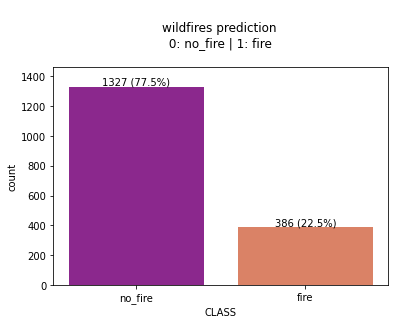

In [ ]:
ax = sns.countplot(x='CLASS', data = df,palette = 'plasma')

plt.title("\nwildfires prediction \n 0: no_fire | 1: fire \n")

plt.margins(0.05, 0.1)

for p in ax.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax.annotate('{} ({:.1f}%)'.format(int(y),100.*y/len(df)), (x.mean(), y), 
          ha='center', va='bottom') 

plt.show()

We can notice that there is class imbalance.Class imbalance is a common problem in machine learning, especially in classification problems. Imbalance data can significantly affect the accuracy of our model.

In [ ]:
# class count
class_count_0, class_count_1 = df['CLASS'].value_counts()

# Separate class
class_0 = df[df['CLASS'] == 'no_fire']
class_1 = df[df['CLASS'] == 'fire']# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1327, 4)
class 1: (386, 4)


In [ ]:
# split the dataset into train features and target varaible
X = df.drop('CLASS', axis=1)
y = df['CLASS']

In [ ]:
#output
y = df["CLASS"]

#replace the categories with numerical values
y.replace({"no_fire":0, "fire":1}, inplace=True)

We balanced our dataset using the oversampling technique via the SMOT method   

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 1327, 1: 386})
Resampled dataset shape Counter({0: 1327, 1: 1327})


total class of fire and no_fire: no_fire    386
fire       386
Name: CLASS, dtype: int64


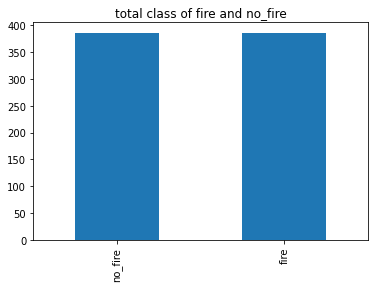

In [ ]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of fire and no_fire:",test_under['CLASS'].value_counts())# plot the count after under-sampeling
test_under['CLASS'].value_counts().plot(kind='bar', title='total class of fire and no_fire')

In [ ]:
# split the tdata
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

## 6: Application of Machine Learning algorithms 

In our simulation, we used eleven of the most popular data mining algorithms: Neural Networks,SVM, Bagging Classifier, Extremely Randomised Trees, Adaboost Classifier, Gradient Boosting, Extreme Gradient Boosting (XGBOOST), Random Forest, Nearest Neighbour, Gaussian Naive Bayes and Stochastic Gradientdescent. 

In [ ]:
#Scaler
scaler = StandardScaler()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.optimizers import Adam # - Works


In [ ]:
xgb_clf = XGBClassifier(learning_rate= 0.1,subsample = 0.8,max_depth = 12)

In [ ]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(max_depth=12, subsample=0.8)

In [ ]:
# Print the accuracy score
print(xgb_clf.score(X_test, y_test))
xgb_score= xgb_clf.score(X_test, y_test)

0.8469259723964868


In [ ]:
# Compute ROC AUC Score
prediction_probability = xgb_clf.predict_proba(X_test)
print(roc_auc_score(y_test, prediction_probability[ : , 1]))
xgb_roc_auc_score = roc_auc_score(y_test, prediction_probability[ : ,1])

0.9063999697698731


In [ ]:
# Computef1_score
prediction = xgb_clf.predict(X_test)
print(f1_score(y_test, prediction, pos_label= 1))
xgb_f1_score = f1_score(y_test, prediction, pos_label= 1)

0.8463476070528968


In [ ]:
# calculate recall
recall = recall_score(y_test, prediction, labels=[1,0], average='micro')
print('Recall: %.3f' % recall)

Recall: 0.847


array([[339,  64],
       [ 58, 336]])

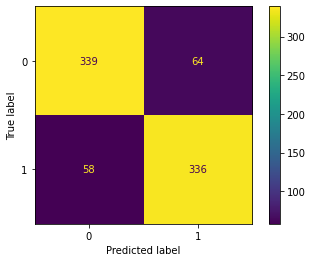

,Predicted Fire,Predicted Not Fire
Fire,336,58
Not fire,64,339


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix ( y_test , prediction)

tn, fp, fn, tp = confusion_matrix ( y_test , prediction).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fire': [tp, fp],
        'Predicted Not Fire': [fn, tn]
    }, index=['Fire', 'Not fire'])
plot_confusion_matrix(xgb_clf, X_test, y_test)  
plt.show()
conf_matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = "gini",n_estimators = 50 )
model.fit(X_train, y_train)
model.score(X_test, y_test)
rf_score= model.score(X_test, y_test)

RandomForestClassifier(n_estimators=50)

0.8506900878293601

In [ ]:
# Compute ROC AUC Score
prediction_probability = model.predict_proba(X_test)
print(roc_auc_score(y_test, prediction_probability[ : , 1]))
rf_roc_auc_score = roc_auc_score(y_test, prediction_probability[ : , 1])

0.911973649406104


In [ ]:
prediction = model.predict(X_test)
print(f1_score(y_test, prediction, pos_label= 1))
rf_f1_score= f1_score(y_test, prediction, pos_label= 1)

0.8514357053682895


In [ ]:
# calculate recall
recall = recall_score(y_test, prediction, labels=[1,0], average='micro')
print('Recall: %.3f' % recall)

Recall: 0.851


array([[337,  66],
       [ 53, 341]])

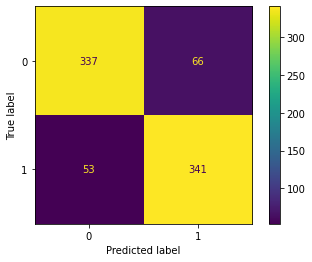

,Predicted Fire,Predicted Not Fire
Fire,341,53
Not fire,66,337


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix ( y_test , prediction)

tn, fp, fn, tp = confusion_matrix ( y_test , prediction).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fire': [tp, fp],
        'Predicted Not Fire': [fn, tn]
    }, index=['Fire', 'Not fire'])
plot_confusion_matrix(model, X_test, y_test)  
plt.show()
conf_matrix

In [ ]:
from sklearn import metrics

**SVM WITH BALANCED CLASS**

In [ ]:
#### GRID SEARCH ON SVM 
clf = SVC(random_state=5)
# defining parameter range 
param_grid = {'C': [0.1,1,10,100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','poly','sigmoid']}  
grid = GridSearchCV(clf, param_grid, refit = True, cv = 5, verbose = 3,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, error_score=0, estimator=SVC(random_state=5), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1, random_state=5)
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       403
           1       0.73      0.81      0.77       394

    accuracy                           0.76       797
   macro avg       0.76      0.76      0.76       797
weighted avg       0.76      0.76      0.76       797

[[288 115]
 [ 76 318]]


**The standard deviation here is used to understand the uncertainty of the model.**

In [ ]:
from sklearn.model_selection import KFold
#### Cross val score
scores_SVM = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)
print(scores_SVM)
#print accuracy and standard deviation 
print("Accuracy: %0.3f (+/- %0.2f)" % (scores_SVM.mean(), scores_SVM.std() * 2))

[0.78717201 0.80174927 0.79008746 0.82163743 0.78070175]
Accuracy: 0.796 (+/- 0.03)


In [ ]:
roc_auc_SVM = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5, scoring='roc_auc')
print(scores_SVM)
#print Roc and standard deviation 
print("ROC: %0.3f (+/- %0.2f)" % (roc_auc_SVM.mean(), roc_auc_SVM.std() * 2))

[0.78717201 0.80174927 0.79008746 0.82163743 0.78070175]
ROC: 0.702 (+/- 0.03)


In [ ]:
f1_score_SVM = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5, scoring='f1')
print(f1_score_SVM)
#print Roc and standard deviation 
print("f1_score: %0.3f (+/- %0.2f)" % (f1_score_SVM.mean(), f1_score_SVM.std() * 2))

[0.29126214 0.34615385 0.33333333 0.42990654 0.28571429]
f1_score: 0.337 (+/- 0.10)


In [ ]:
recall_score_SVM = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5, scoring='recall')
print(recall_score_SVM)
#print Roc and standard deviation 
print("recall: %0.3f (+/- %0.2f)" % (recall_score_SVM.mean(), recall_score_SVM.std() * 2))

[0.19480519 0.23376623 0.23076923 0.2987013  0.19480519]
recall: 0.231 (+/- 0.08)


**BAGGING CLASSIFER (Built on SVM with Balanced Class)**

In [ ]:
#grid search for bagging classifier using the SVM classifer obtained above 

bag = BaggingClassifier(grid.best_estimator_, n_jobs=-1, random_state=5)

param_grid = {'n_estimators': list(range(0, 110, 10))[1:],  'max_features': list (range(1,21, 2))}  

grid = GridSearchCV(bag, param_grid, refit = True, cv = 5, verbose = 3,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, error_score=0,
             estimator=BaggingClassifier(base_estimator=SVC(C=100, gamma=1,
                                                            random_state=5),
                                         n_jobs=-1, random_state=5),
             n_jobs=-1,
             param_grid={'max_features': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=3)

{'max_features': 3, 'n_estimators': 80}
BaggingClassifier(base_estimator=SVC(C=100, gamma=1, random_state=5),
                  max_features=3, n_estimators=80, n_jobs=-1, random_state=5)
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       403
           1       0.74      0.80      0.77       394

    accuracy                           0.77       797
   macro avg       0.77      0.77      0.77       797
weighted avg       0.77      0.77      0.77       797

[[294 109]
 [ 77 317]]


In [ ]:
from sklearn.model_selection import cross_val_score
#bagging classifier (SVM)
scores_BAG = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)
#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_BAG.mean(), scores_BAG.std() * 2))

Accuracy: 0.7916 (+/- 0.0229)


In [ ]:
roc_auc_BAG = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5, scoring='roc_auc')
print(roc_auc_BAG )
#print Roc and standard deviation 
print("ROC: %0.3f (+/- %0.2f)" % (roc_auc_BAG .mean(), roc_auc_BAG .std() * 2))

[0.7481203  0.7646226  0.73265602 0.69948542 0.71737319]
ROC: 0.732 (+/- 0.05)


In [ ]:
f1_score_BAG = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5, scoring='f1')
print(f1_score_BAG)
#print Roc and standard deviation 
print("f1_score: %0.3f (+/- %0.2f)" % (f1_score_BAG.mean(), f1_score_BAG.std() * 2))

[0.26262626 0.35514019 0.32727273 0.39252336 0.26923077]
f1_score: 0.321 (+/- 0.10)


**EXTRA TREES CLASSIFIER**

In [ ]:
#### GRID SEARCH for extra trees classifier 

ext = ExtraTreesClassifier(n_jobs=-1, random_state=5)
# defining parameter range 
param_grid = {'n_estimators': list(range(0, 110, 10))[1:],  'max_features': list (range(1,21, 2)), 'max_depth' :list(range(1,21, 2))}  
  

grid = GridSearchCV(ext, param_grid, refit = True, cv = 5, verbose = 3,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, error_score=0,
             estimator=ExtraTreesClassifier(n_jobs=-1, random_state=5),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=3)

{'max_depth': 17, 'max_features': 3, 'n_estimators': 40}
ExtraTreesClassifier(max_depth=17, max_features=3, n_estimators=40, n_jobs=-1,
                     random_state=5)
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       403
           1       0.81      0.86      0.84       394

    accuracy                           0.83       797
   macro avg       0.83      0.83      0.83       797
weighted avg       0.83      0.83      0.83       797

[[323  80]
 [ 54 340]]


In [ ]:
#Accuracy for extra trees classifier 
scores_EXT = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)
#print accuracy and standard deviation 
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_EXT.mean(), scores_EXT.std() * 2))

Accuracy: 0.8324 (+/- 0.0240)


**ADABOOST CLASSIFIER**

In [ ]:
#### GRID SEARCH for Ada bosst classifier 

adb = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, class_weight='balanced'), random_state=5)
# defining parameter range 
param_grid = {'n_estimators': list(range(0, 110, 10))[1:],  'learning_rate': [0.2, 0.4, 0.6, 0.8, 1]}  
  

grid = GridSearchCV(adb, param_grid, refit = True, cv = 5, verbose = 3,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, error_score=0,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                max_depth=1),
                                          random_state=5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.4, 0.6, 0.8, 1],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=3)

{'learning_rate': 1, 'n_estimators': 80}
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1),
                   learning_rate=1, n_estimators=80, random_state=5)
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       403
           1       0.74      0.76      0.75       394

    accuracy                           0.75       797
   macro avg       0.75      0.75      0.75       797
weighted avg       0.75      0.75      0.75       797

[[300 103]
 [ 95 299]]


In [ ]:
#Adaboost classifier 
scores_ADB = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_ADB.mean(), scores_ADB.std() * 2))

Accuracy: 0.6889 (+/- 0.0527)


**GRADIENT BOOSTING**

In [ ]:
#Gradient Boosting 
gb_clf2 = GradientBoostingClassifier( subsample=0.289, random_state=5)
# defining parameter range 
param_grid = {'n_estimators': list(range(0, 110, 10))[1:],  'max_features': list (range(1,21, 2)), 'max_depth' :list(range(1,21, 2))}  
  

grid = GridSearchCV(gb_clf2, param_grid, refit = True, cv = 5, verbose = 3,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, error_score=0,
             estimator=GradientBoostingClassifier(random_state=5,
                                                  subsample=0.289),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=3)

{'max_depth': 11, 'max_features': 1, 'n_estimators': 90}
GradientBoostingClassifier(max_depth=11, max_features=1, n_estimators=90,
                           random_state=5, subsample=0.289)
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       403
           1       0.84      0.86      0.85       394

    accuracy                           0.85       797
   macro avg       0.85      0.85      0.85       797
weighted avg       0.85      0.85      0.85       797

[[340  63]
 [ 54 340]]


In [ ]:
#Gradient boosting classfier 
scores_GB = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_GB.mean(), scores_GB.std() * 2))

Accuracy: 0.8342 (+/- 0.0178)


**XGBOOST**

In [ ]:
xg_clf = xgb.XGBClassifier(random_state=5)

param_grid = {'n_estimators': list(range(0, 110, 10))[1:] ,  'max_features': list (range(1,21, 2)), 'max_depth':list(range(1,21, 2))}  
  

grid = GridSearchCV(xg_clf , param_grid, refit = True, cv = 5, verbose = 3,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, error_score=0, estimator=XGBClassifier(random_state=5),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=3)

{'max_depth': 17, 'max_features': 1, 'n_estimators': 80}
XGBClassifier(max_depth=17, max_features=1, n_estimators=80, random_state=5)
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       403
           1       0.84      0.87      0.85       394

    accuracy                           0.85       797
   macro avg       0.85      0.85      0.85       797
weighted avg       0.85      0.85      0.85       797

[[336  67]
 [ 51 343]]


In [ ]:
#Extreme Gradient Boosting classifier 
scores_XGB = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_XGB.mean(), scores_XGB.std() * 2))

Accuracy: 0.8243 (+/- 0.0436)


**RANDOM FOREST**

In [ ]:
#Random Forest

rf_clf2 = RandomForestClassifier(random_state=5)


param_grid = {'n_estimators': list(range(0, 110, 10))[1:], 'max_features': list (range(1,21, 2)), 'max_depth' :list(range(0,21, 2))[1:]}  
  

grid = GridSearchCV(rf_clf2 , param_grid, refit = True, cv = 5, verbose = 3,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, error_score=0,
             estimator=RandomForestClassifier(random_state=5), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'max_features': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=3)

{'max_depth': 20, 'max_features': 3, 'n_estimators': 50}
RandomForestClassifier(max_depth=20, max_features=3, n_estimators=50,
                       random_state=5)
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       403
           1       0.83      0.86      0.84       394

    accuracy                           0.84       797
   macro avg       0.84      0.84      0.84       797
weighted avg       0.84      0.84      0.84       797

[[336  67]
 [ 57 337]]


In [ ]:
#Random Forest classfier 
scores_RF = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_RF.mean(), scores_RF.std() * 2))

Accuracy: 0.8289 (+/- 0.0338)


In [ ]:
roc_auc_RF = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5, scoring='roc_auc')
print(scores_RF)
#print Roc and standard deviation 
print("ROC: %0.3f (+/- %0.2f)" % (roc_auc_RF.mean(), roc_auc_RF.std() * 2))

[0.83090379 0.85131195 0.8425656  0.8128655  0.80701754]
ROC: 0.817 (+/- 0.06)


In [ ]:
f1_score_RF = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5, scoring='f1')
print(f1_score_RF)
#print Roc and standard deviation 
print("f1_score: %0.3f (+/- %0.2f)" % (f1_score_RF.mean(), f1_score_RF.std() * 2))

[0.57971014 0.61068702 0.57142857 0.52238806 0.51470588]
f1_score: 0.560 (+/- 0.07)


In [ ]:
recall_score_RF = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5, scoring='recall')
print(recall_score_RF)
#print Roc and standard deviation 
print("recall: %0.3f (+/- %0.2f)" % (recall_score_RF.mean(), recall_score_RF.std() * 2))

[0.51948052 0.51948052 0.46153846 0.45454545 0.45454545]
recall: 0.482 (+/- 0.06)


**NEURAL NETWORK**

In [ ]:
ml_clf2 = MLPClassifier(hidden_layer_sizes=30
                        , activation='relu', solver='adam', alpha=1, random_state=5,)
param_grid = {'hidden_layer_sizes': list(range(0, 51, 5))[1:]}  
  

grid = GridSearchCV(ml_clf2 , param_grid, refit = True, cv = 5, verbose = 3,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, error_score=0,
             estimator=MLPClassifier(alpha=1, hidden_layer_sizes=30,
                                     random_state=5),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [5, 10, 15, 20, 25, 30, 35, 40,
                                                45, 50]},
             verbose=3)

{'hidden_layer_sizes': 50}
MLPClassifier(alpha=1, hidden_layer_sizes=50, random_state=5)
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       403
           1       0.66      0.75      0.70       394

    accuracy                           0.69       797
   macro avg       0.69      0.69      0.69       797
weighted avg       0.69      0.69      0.69       797

[[251 152]
 [ 98 296]]


In [ ]:
#MLP Classifier
scores_NN = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_NN.mean(), scores_NN.std() * 2))

Accuracy: 0.7828 (+/- 0.0150)


**NEAREST NEIGHBOUR**

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3, algorithm="brute")
param_grid = {'n_neighbors': list(range(1, 15, 2))}  

grid = GridSearchCV(neigh , param_grid, refit = True, cv = 5, verbose = 3,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 
neigh.fit(scaler.fit_transform(X_train), y_train)
predictions = neigh.predict(scaler.transform(X_test))

print(classification_report(y_test, predictions)) 
print(accuracy_score(y_test, predictions))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, error_score=0,
             estimator=KNeighborsClassifier(algorithm='brute', n_neighbors=3),
             n_jobs=-1, param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13]},
             verbose=3)

{'n_neighbors': 1}
KNeighborsClassifier(algorithm='brute', n_neighbors=1)
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       403
           1       0.77      0.79      0.78       394

    accuracy                           0.78       797
   macro avg       0.78      0.78      0.78       797
weighted avg       0.78      0.78      0.78       797

[[310  93]
 [ 81 313]]


KNeighborsClassifier(algorithm='brute', n_neighbors=3)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       403
           1       0.75      0.78      0.76       394

    accuracy                           0.76       797
   macro avg       0.76      0.76      0.76       797
weighted avg       0.76      0.76      0.76       797

0.7603513174404015


In [ ]:
#Nearest NEighbour Classifier
scores_NNeigh = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_NNeigh.mean(), scores_NNeigh.std() * 2))

Accuracy: 0.7770 (+/- 0.0266)


**GAUSSIAN NAIVE BAYES**

In [ ]:
#NAive bayes classfier
gnb = GaussianNB()
scores_NB = cross_val_score(gnb, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_NB.mean(), scores_NB.std() * 2))

Accuracy: 0.7776 (+/- 0.0128)


**STOCHASTIC GRADIENT**

In [ ]:
param_grid = {'loss': ['hinge', 'log', 'modified_huber',
    'squared_hinge', 'perceptron', 'squared_loss',
    'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}
sgc = SGDClassifier(random_state=5, class_weight='balanced')
grid = GridSearchCV(sgc , param_grid, refit = True, cv = 5, verbose = 3,
                    error_score=0,
                    n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(scaler.fit_transform(X_train), y_train) 

#### Best Grid search parameter fitting

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

grid_predictions = grid.predict(scaler.transform(X_test)) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 
print(confusion_matrix(y_test, grid_predictions)) 
neigh.fit(scaler.fit_transform(X_train), y_train)
predictions = neigh.predict(scaler.transform(X_test))
print(classification_report(y_test, predictions)) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, error_score=0,
             estimator=SGDClassifier(class_weight='balanced', random_state=5),
             n_jobs=-1,
             param_grid={'loss': ['hinge', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron', 'squared_loss',
                                  'huber', 'epsilon_insensitive',
                                  'squared_epsilon_insensitive']},
             verbose=3)

{'loss': 'huber'}
SGDClassifier(class_weight='balanced', loss='huber', random_state=5)
              precision    recall  f1-score   support

           0       0.75      0.39      0.51       403
           1       0.58      0.87      0.70       394

    accuracy                           0.62       797
   macro avg       0.67      0.63      0.60       797
weighted avg       0.67      0.62      0.60       797

[[156 247]
 [ 52 342]]


KNeighborsClassifier(algorithm='brute', n_neighbors=3)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       403
           1       0.75      0.78      0.76       394

    accuracy                           0.76       797
   macro avg       0.76      0.76      0.76       797
weighted avg       0.76      0.76      0.76       797



In [ ]:
#Stochastic Gradient boosting classifier 
scores_SGD = cross_val_score(grid.best_estimator_, scaler.fit_transform(X), y, cv=5)

#print accuracy and standard deviation
print("Accuracy: %0.4f (+/- %0.4f)" % (scores_SGD.mean(), scores_SGD.std() * 2))

Accuracy: 0.6094 (+/- 0.0949)


In [ ]:
#Creating plot elelments
models = ['SVM with bal', 'BAG_SVM wit bal', 'EXT with bal', 'ADB with bal', 'GB', 'XGB', 'RF', 'NN', 'NNEIGH', 'NB', 'SGD with bal']
x_pos = np.arange(len(models))
mean = [scores_SVM.mean(), scores_BAG.mean(), scores_EXT.mean(), scores_ADB.mean(), scores_GB.mean(), scores_XGB.mean(), scores_RF.mean(),scores_NN.mean(), scores_NNeigh.mean(), scores_NB.mean(), scores_SGD.mean() ]
std = [scores_SVM.std(), scores_BAG.std(), scores_EXT.std(), scores_ADB.std(), scores_GB.std(), scores_XGB.std(), scores_RF.std(),scores_NN.std(), scores_NNeigh.std(), scores_NB.std(), scores_SGD.std() ]

<BarContainer object of 11 artists>

Text(0, 0.5, 'Accuracy')

[Text(0, 0, 'SVM with bal'),
 Text(0, 0, 'BAG_SVM wit bal'),
 Text(0, 0, 'EXT with bal'),
 Text(0, 0, 'ADB with bal'),
 Text(0, 0, 'GB'),
 Text(0, 0, 'XGB'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'NN'),
 Text(0, 0, 'NNEIGH'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SGD with bal')]

Text(0.5, 1.0, 'Accuracy and standard deviation of classifiers in predicting wildfires')

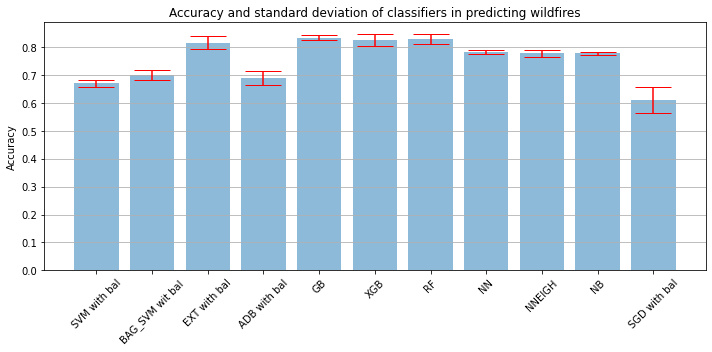

In [ ]:
#plot with class weight balance 
fig, ax = plt.subplots(figsize =(10,5))
ax.bar(x_pos, mean, yerr=std, align='center', alpha=0.5, ecolor='red', capsize=18)
ax.set_ylabel('Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=45)
ax.set_title('Accuracy and standard deviation of classifiers in predicting wildfires')
ax.yaxis.grid(True)
# Save the figure and show
plt.tight_layout()
plt.savefig("accuracy_1")
plt.show()

SVM = Support Vector Machine with Balanced Class Weight.

BAG_SVM = bagging Classifiers (of SVMs with Balanced Class Weight).

EXT = Extra Trees Classifier with Balanced Class Weight

ADB = Adabost Classifier with Balanced Class Weight

GB = Gradient Boosting

XGB = Extreme Gradient Boosting

RF = Random Forest

NN = Neural Network

NNEIGH = Nearest Neighbour

SGD = Stochastic Gradient Descent with Balanced Class Weight



The best accuracy among the eleven models is obtained by using the Random Forest and Extreme Gradient Boosting (XGBOOST) classifiers.
Extreme Gradient Boosting (XGBOOST).

The accuracy is 85.06% for the Random Forest model and 84.7% for XGBoost respectively.